#Optimizing of Stock Portfolio Diversification

Installing necessary libraries

In [1]:
!pip install skfolio;
!pip install arch;
!pip install yfinance;
!pip install pypfopt[plotting];
!pip install quantstats;
!pip install pypfopt;
!pip install ta;
!pip install financetoolkit;
!pip install tabulate;
!pip install plotly;
!pip install statsmodels;
!pip install --upgrade scikit-learn;
!pip install PyPortfolioOpt;
!pip install --upgrade matplotlib;
!pip install --upgrade pandas;
!pip install pandas_datareader;
!pip install SLSQP;

ERROR: Could not find a version that satisfies the requirement pypfopt[plotting] (from versions: none)
ERROR: No matching distribution found for pypfopt[plotting]


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.6 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 11.6 MB/s eta 0:00:01
   ------ --------------------------------- 2.0/11.6 MB 11.8 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 14.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.6/11.6 MB 13.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.9/11.6 MB 15.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.6/11.6 MB 15.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 16.7 MB/s eta 0:00:01
   ------------------------ --------------- 7.2/11.6 MB 15.8 MB/s eta 0:00:01
   ---------------------------- ----------- 8.3/11.6 MB 16.6 MB/s eta 0:00:01
   -------------------------------- ------- 9.3/11.6 MB 17.1 MB/s eta 0:00

ERROR: Could not find a version that satisfies the requirement SLSQP (from versions: none)
ERROR: No matching distribution found for SLSQP


Importing libraries

In [17]:
#Data handling and Statistical Analysis
import pandas as pd
import numpy as np
import seaborn as sns


#Data Visualization

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from plotly.io import show

from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

#Financial Data
import yfinance as yf
import ta
import quantstats as qs

#Optimization and Allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


#Datetime and Warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from tabulate import tabulate

#Model Building
from sklearn.model_selection import train_test_split
from skfolio import PerfMeasure, RatioMeasure, RiskMeasure
from skfolio.optimization import MeanRisk
from skfolio.preprocessing import prices_to_returns
from statsmodels.stats import descriptivestats
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from arch import arch_model
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from glob import glob


from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.optimize import minimize


import time

Fetching historical time series

In [109]:
# List of selected (26) companies from JSE 
jse_tickers = [
    #Mining and Resources
    'AGL.JO', # Anglo American
    'SOL.JO', # Sasol
    'GFI.JO', # Gold Fields
    'ANG.JO', # AngloGold Ashanti
    'IMP.JO', # Impala Platinum
    'GLN.JO', # Glencore
    # Financials
    'SBK.JO', # Standard Bank
    'FSR.JO', # FirstRand Bank
    'DSY.JO', # Discovery Bank
    'NED.JO', # Nedbank
    'CPI.JO', # Capitec
    'INL.JO', # Investec
    # Retail and Consumer Goods
    'SHP.JO', # Shoprite
    'WHL.JO', # Woolworths
    'PPH.JO', # Pepkor
    'TFG.JO', # The Foschini Group
    'RCL.JO', # RCL Foods
    # Telecommunications
    'MTN.JO', # MTN Group
    'VOD.JO', # Vodacom
    # Healthcare
    'NTC.JO', # Netcare
    'APN.JO', # Aspen Pharmacare
    # Industrial
    'BVT.JO', # Bidvest
    'BID.JO', # Bidcorp
    'BAW.JO', # Barloworld
    # Investment Holding
    'NPN.JO', # Naspers
    'REM.JO', # Remgro
]


# Function to download historical time series for a list of JSE tickers and calculate Return and Volatility
def get_jse_timeseries(tickers, start_date='2018-01-01', end_date='2024-06-30'):
    """
    Download historical data for a list of JSE tickers using yfinance and calculate Return and Volatility.

    Parameters:
    tickers (list): List of stock tickers (with .JO suffix for JSE stocks).
    start_date (str): Start date for the data in 'yyyy-mm-dd' format.
    end_date (str): End date for the data in 'yyyy-mm-dd' format.

    Returns:
    DataFrame: Combined historical stock data with custom columns.
    """
    all_timeseries = []

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        if not stock_data.empty:
            # Calculate daily return
            stock_data['Returns'] = stock_data['Adj Close'].pct_change()

            # Calculate rolling volatility (30-day window)
            stock_data['Volatility'] = stock_data['Returns'].rolling(window=30).std() * np.sqrt(252)

            # Add a ticker column to identify the stocks
            stock_data['Tickers'] = ticker

            # Append the processed data to the list
            all_data.append(stock_data)
        else:
            print(f"No data found for {ticker}")

    # Combine the data from all tickers
    combined_data = pd.concat(all_timeseries, axis=0)

    # Reindex with date and drop rows with missing values (if any)
    combined_data = combined_data.dropna().reset_index()

    # Reorder and select only the desired columns
    combined_data = combined_data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume","Returns", "Volatility", "Tickers"]]

    # Set 'Date' as the index
    combined_data.set_index("Date", inplace=True)

    return combined_data

# Example usage
start_date = '2018-01-01'
end_date = '2024-06-30'

# Download data for JSE Top stocks
stock_data = get_jse_timeseries(jse_tickers, start_date, end_date)

# Display the first few rows of the final dataset
print(stock_data.head())


Fetching data for AGL.JO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for SOL.JO...
Fetching data for GFI.JO...
Fetching data for ANG.JO...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for IMP.JO...
Fetching data for GLN.JO...
Fetching data for SBK.JO...
Fetching data for FSR.JO...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for DSY.JO...
Fetching data for NED.JO...
Fetching data for CPI.JO...
Fetching data for INL.JO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for SHP.JO...
Fetching data for WHL.JO...
Fetching data for PPH.JO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for TFG.JO...
Fetching data for RCL.JO...
Fetching data for MTN.JO...
Fetching data for VOD.JO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for NTC.JO...
Fetching data for APN.JO...
Fetching data for BVT.JO...
Fetching data for BID.JO...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for BAW.JO...
Fetching data for NPN.JO...
Fetching data for REM.JO...
                    Open          High           Low         Close  \
Date                                                                 
2018-02-13  27289.802734  27836.595703  27130.447266  27797.751953   
2018-02-14  27787.792969  27833.607422  27095.587891  27602.541016   
2018-02-15  28176.224609  28683.177734  28000.931641  28130.410156   
2018-02-16  28334.583984  28584.576172  28082.601562  28238.970703   
2018-02-19  28873.408203  29072.605469  28084.593750  28177.220703   

               Adj Close   Volume   Returns  Volatility Tickers  
Date                                                             
2018-02-13  21931.919922  1787929  0.029661    0.264699  AGL.JO  
2018-02-14  21777.906250  1411489 -0.007022    0.265901  AGL.JO  
2018-02-15  22194.382812  2661952  0.019124    0.270383  AGL.JO  
2018-02-16  22280.035156  1387514  0.003859    0.269727  AGL.JO  
2018-02-19  22231.314453   90

Rename the dataframe to df

In [111]:
df =stock_data.dropna() # dropna values
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,Tickers
Date,,,,,,,,,
2018-02-13,27289.802734,27836.595703,27130.447266,27797.751953,21931.919922,1787929,0.029661,0.264699,AGL.JO
2018-02-14,27787.792969,27833.607422,27095.587891,27602.541016,21777.906250,1411489,-0.007022,0.265901,AGL.JO
2018-02-15,28176.224609,28683.177734,28000.931641,28130.410156,22194.382812,2661952,0.019124,0.270383,AGL.JO
2018-02-16,28334.583984,28584.576172,28082.601562,28238.970703,22280.035156,1387514,0.003859,0.269727,AGL.JO
2018-02-19,28873.408203,29072.605469,28084.593750,28177.220703,22231.314453,900735,-0.002187,0.264071,AGL.JO


Creating another copy of the dataframe

In [114]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41392 entries, 2018-02-13 to 2024-06-28
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        41392 non-null  float64
 1   High        41392 non-null  float64
 2   Low         41392 non-null  float64
 3   Close       41392 non-null  float64
 4   Adj Close   41392 non-null  float64
 5   Volume      41392 non-null  int64  
 6   Returns     41392 non-null  float64
 7   Volatility  41392 non-null  float64
 8   Tickers     41392 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.2+ MB


Creating new features, Pred_Returns and Target columns

In [117]:
df["Pred_Returns"] = df["Returns"].shift(-1) #This is the colum that shows us the next day's Returns.
#Now creating the target column from the tomorrow's returns column
df['Target'] =  (df["Pred_Returns"]> 0).astype(int).drop(columns='Tickers')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility,Tickers,Pred_Returns,Target
Date,,,,,,,,,,,
2018-02-13,27289.802734,27836.595703,27130.447266,27797.751953,21931.919922,1787929,0.029661,0.264699,AGL.JO,-0.007022,0
2018-02-14,27787.792969,27833.607422,27095.587891,27602.541016,21777.906250,1411489,-0.007022,0.265901,AGL.JO,0.019124,1
2018-02-15,28176.224609,28683.177734,28000.931641,28130.410156,22194.382812,2661952,0.019124,0.270383,AGL.JO,0.003859,1
2018-02-16,28334.583984,28584.576172,28082.601562,28238.970703,22280.035156,1387514,0.003859,0.269727,AGL.JO,-0.002187,0
2018-02-19,28873.408203,29072.605469,28084.593750,28177.220703,22231.314453,900735,-0.002187,0.264071,AGL.JO,0.003853,1


Create the feature matrix

In [121]:
features = ['Open', 'High', 'Low', 'Volume','Volatility', 'Pred_Returns','Tickers']
X = df[features]
X=pd.DataFrame(X)
y = df['Target']

# Split the data into training and testing sets
X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Drop ticker columns

In [124]:
X_test = X_test_a.drop(columns='Tickers')
X_train = X_train_a.drop(columns='Tickers')

In [126]:
X_train.head(), X_test.head()

(                    Open         High           Low   Volume  Volatility  \
 Date                                                                       
 2021-05-24  24200.000000  24296.00000  23145.000000  2622972    0.385071   
 2021-04-01  28605.000000  28839.00000  28146.000000   890435    0.308105   
 2023-10-12  11122.000000  11180.00000  11039.000000   469835    0.258364   
 2018-08-01   1650.000000   1680.00000   1615.000000  2683324    0.292029   
 2021-09-01   5772.269531   5806.92334   5613.047363   853231    0.241181   
 
             Pred_Returns  
 Date                      
 2021-05-24      0.003900  
 2021-04-01      0.020766  
 2023-10-12     -0.021578  
 2018-08-01     -0.017921  
 2021-09-01     -0.007461  ,
                Open     High      Low   Volume  Volatility  Pred_Returns
 Date                                                                    
 2022-05-26  32299.0  32939.0  31529.0   958205    0.344017      0.015785
 2023-06-19  26915.0  28152.0  26930.0  

# Model building

Instantiate the xgb classifier model with default parameters

In [25]:
xgb_clf = XGBClassifier()

Defining the parameter space

In [28]:
param_grid = {
    'max_depth': [3, 5, 7], #the maximum depth of each tree. It helps limit how much the model has to learn about the training dataset
    'learning_rate': [0.01, 0.1, 0.2], #Controls the rate at which the model learns by adjusting the impact of each tree. small rates improve generalisation
    'n_estimators': [100, 200], #number of trees in the model.
    }

In [ ]:
param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200,300],
    }

Searching for the best parameters and fitting the model with the best parameters

In [31]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
xgb_model = grid_search.best_estimator_

# Step 4: Train the Model on Balanced Data
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
xgb_model.score(X_test, y_test)

0.9995168304074731

In [35]:
# xgb_model.get_xgb_params()

Define a function which constructs an optimum portfolio using XGBoost classifier.

Define a function which calculates tgeh expected return and the volatility of a portfolio.

Define another function which calculates the negative Sharpe ratio, which is to be minimised. This is equivakent to maximising the positive Sharpe ratio.


In [134]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from scipy.optimize import minimize

start_time = time.time()
# Function to calculate portfolio performance (returns and volatility)
def portfolio_annual_performance(weights, mean_returns, cov_matrix): #inputs required by this function.
    """
    Calculate the expected return and volatility of a portfolio.
    """
    returns = np.sum(weights * mean_returns) * 252  # Annualized returns (252 trading days)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualized volatility
    return returns, volatility

# Function to calculate the negative Sharpe ratio (to be minimized)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate): # these are the inputs taken by the function.
    """
    Calculate the negative Sharpe ratio (for minimization).
    """
    returns, volatility = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (returns - risk_free_rate) / volatility
    return -sharpe_ratio

features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Pred_Returns' , 'Volatility']
X = df[features]
X=pd.DataFrame(X)
y = df['Target']

def optimal_xgb_portfolio(data, target_column, feature_columns, returns_column, risk_free_rate=0.01, test_size=0.3, random_state=42):
    """
    Build an optimal stock portfolio using a Random Forest model with hyperparameter tuning via GridSearchCV,
    followed by Markowitz Mean-Variance optimization.

    Parameters:
    data (DataFrame): The stock data containing features, target (buy/sell signal), and returns.
    target_column (str): The name of the column containing the target variable (e.g., 'Target' for buy/sell signals).
    feature_columns (list): A list of column names to be used as features for prediction.
    returns_column (str): The name of the column containing stock returns (daily/weekly/monthly).
    risk_free_rate (float): The risk-free rate for Sharpe ratio calculation (default is 0.01 or 1%).
    test_size (float): The proportion of the data to use as the test set.
    random_state (int): The random state for reproducibility.

    Returns:
    dict: A dictionary containing the optimal portfolio weights, Sharpe ratio, and the classification report.
    """
    # Step 1: Split the data into features and target
    X = df[feature_columns]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

    np.random.seed(random_state)
    # Step 3: Hyperparameter Tuning for Random Forest


    # Step 2: Define and fit the Random Forest model
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200,300],
    }
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Get the best model
    xgb_model = grid_search.best_estimator_

    # Step 4: Train the Model on Balanced Data
    xgb_model.fit(X_train, y_train)



    # Step 3: Evaluate model performance on validation set
    y_val_pred = xgb_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    classification_rep = classification_report(y_val, y_val_pred)

    # Step 4: Portfolio Optimization based on validation predictions
    # Filter stocks predicted to increase in price
    predicted_positive = X_val.loc[y_val_pred == 1]

    # Ensure correct calculation of returns and covariances
    stock_returns = data.loc[predicted_positive.index, returns_column]
    mean_returns = stock_returns.mean()
    cov_matrix = data.pivot(columns='Tickers', values=returns_column).cov()

    # Set bounds and constraints for optimization
    num_stocks = len(data['Tickers'].unique())
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0.01, 1) for _ in range(num_stocks))  # Ensure minimum weight of 0.01

    initial_weights = num_stocks * [1. / num_stocks]

    # Optimize portfolio by minimizing negative Sharpe ratio
    optimal_portfolio = minimize(neg_sharpe_ratio, initial_weights,
                                 args=(mean_returns, cov_matrix, risk_free_rate),
                                 method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = optimal_portfolio.x
    optimal_weights_dict = dict(zip(cov_matrix, optimal_weights))

    # Step 5: Calculate the optimal portfolio's performance
    optimal_returns, optimal_volatility = portfolio_annual_performance(optimal_weights, mean_returns, cov_matrix)
    optimal_sharpe_ratio = (optimal_returns - risk_free_rate) / optimal_volatility

    # Return the optimal portfolio and model performance
    return {
        'optimal_weights_dict': optimal_weights_dict,
        'optimal_returns': optimal_returns,
        'optimal_volatility': optimal_volatility,
        'optimal_sharpe_ratio': optimal_sharpe_ratio,
        'classification_report': classification_rep,
        'validation_accuracy': val_accuracy,
    }

# Example usage of the function
result = optimal_xgb_portfolio(df, target_column='Target', feature_columns=["Open", "High", "Low", "Close", "Adj Close", "Volume", "Volatility"], returns_column='Pred_Returns')

# Print the results
print("Paired Optimal Weights:", result['optimal_weights_dict'])
print("Optimal Returns:", result['optimal_returns'])
print("Optimal Volatility:", result['optimal_volatility'])
print("Optimal Sharpe Ratio:", result['optimal_sharpe_ratio'])
print("Validation Accuracy:", result['validation_accuracy'])
print("Classification Report:\n", result['classification_report'])


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Paired Optimal Weights: {'AGL.JO': 0.01, 'ANG.JO': 0.05904890512083695, 'APN.JO': 0.03425484857310854, 'BAW.JO': 0.01, 'BID.JO': 0.09601330235056181, 'BVT.JO': 0.01, 'CPI.JO': 0.01, 'DSY.JO': 0.01, 'FSR.JO': 0.010000000000000234, 'GFI.JO': 0.02452385230346549, 'GLN.JO': 0.06360294765951503, 'IMP.JO': 0.010000000000000545, 'INL.JO': 0.01, 'MTN.JO': 0.010000000000000791, 'NED.JO': 0.0100000000000002, 'NPN.JO': 0.06401615521395204, 'NTC.JO': 0.0860104138796837, 'PPH.JO': 0.05297780917139872, 'RCL.JO': 0.1030492773510501, 'REM.JO': 0.01, 'SBK.JO': 0.01, 'SHP.JO': 0.05850806255882685, 'SOL.JO': 0.010000000000000285, 'TFG.JO': 0.01, 'VOD.JO': 0.2079944258176001, 'WHL.JO': 0.01}
Optimal Returns: 0.23325671770713235
Optimal Volatility: 0.17458573690705673
Optimal Sharpe Ratio: 1.2787798228098457
Validation Accuracy: 0.5107851596203624
Classification Report:
               precision    recall  f1-score   support

           0       0.

In [142]:
result['optimal_weights_dict']

{'AGL.JO': 0.01,
 'ANG.JO': 0.05904890512083695,
 'APN.JO': 0.03425484857310854,
 'BAW.JO': 0.01,
 'BID.JO': 0.09601330235056181,
 'BVT.JO': 0.01,
 'CPI.JO': 0.01,
 'DSY.JO': 0.01,
 'FSR.JO': 0.010000000000000234,
 'GFI.JO': 0.02452385230346549,
 'GLN.JO': 0.06360294765951503,
 'IMP.JO': 0.010000000000000545,
 'INL.JO': 0.01,
 'MTN.JO': 0.010000000000000791,
 'NED.JO': 0.0100000000000002,
 'NPN.JO': 0.06401615521395204,
 'NTC.JO': 0.0860104138796837,
 'PPH.JO': 0.05297780917139872,
 'RCL.JO': 0.1030492773510501,
 'REM.JO': 0.01,
 'SBK.JO': 0.01,
 'SHP.JO': 0.05850806255882685,
 'SOL.JO': 0.010000000000000285,
 'TFG.JO': 0.01,
 'VOD.JO': 0.2079944258176001,
 'WHL.JO': 0.01}

In [44]:
import pandas as pd

# Convert the dictionary to a DataFrame
optimal_weights_df = pd.DataFrame(list(result['optimal_weights_dict'].items()), columns=['Ticker', 'Weight']).sort_values(by='Weight', ascending=False)

# Print the DataFrame in LaTeX format
print(optimal_weights_df.to_latex(index=False))


\begin{tabular}{lr}
\toprule
Ticker & Weight \\
\midrule
VOD.JO & 0.207718 \\
RCL.JO & 0.103015 \\
BID.JO & 0.095949 \\
NTC.JO & 0.085940 \\
NPN.JO & 0.064008 \\
GLN.JO & 0.063800 \\
ANG.JO & 0.059327 \\
SHP.JO & 0.058258 \\
PPH.JO & 0.053355 \\
APN.JO & 0.034328 \\
GFI.JO & 0.024302 \\
BAW.JO & 0.010000 \\
IMP.JO & 0.010000 \\
SOL.JO & 0.010000 \\
DSY.JO & 0.010000 \\
NED.JO & 0.010000 \\
SBK.JO & 0.010000 \\
FSR.JO & 0.010000 \\
BVT.JO & 0.010000 \\
REM.JO & 0.010000 \\
AGL.JO & 0.010000 \\
CPI.JO & 0.010000 \\
TFG.JO & 0.010000 \\
INL.JO & 0.010000 \\
WHL.JO & 0.010000 \\
MTN.JO & 0.010000 \\
\bottomrule
\end{tabular}



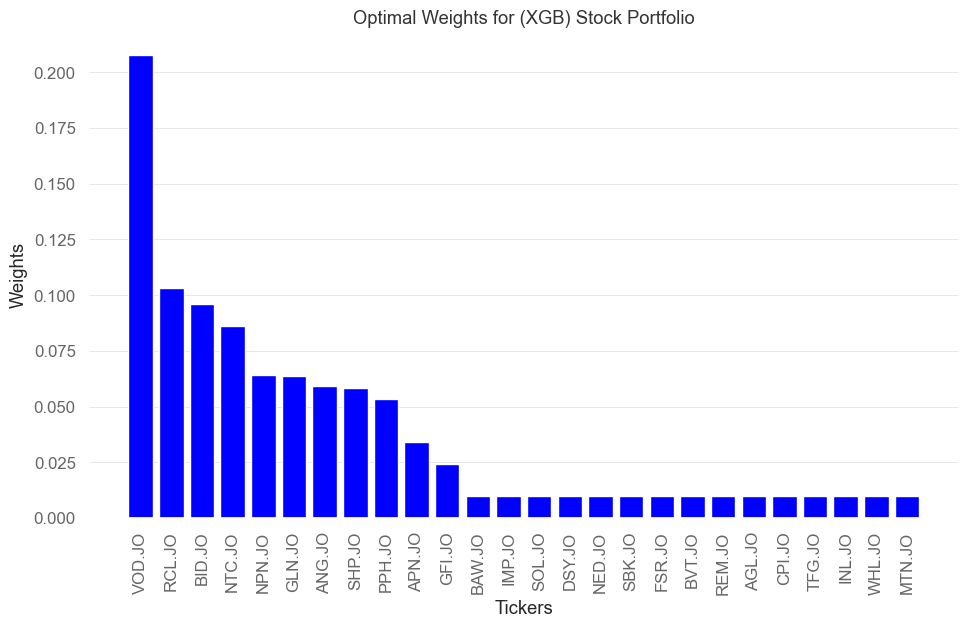

In [46]:
import matplotlib.pyplot as plt
# Plot the weights as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(optimal_weights_df['Ticker'], optimal_weights_df['Weight'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Tickers')
plt.ylabel('Weights')
plt.title('Optimal Weights for (XGB) Stock Portfolio')
plt.grid(axis='x')  # Add gridlines to the y-axis for better visualization
plt.show()


Building a Random Forest model with default parameters

In [146]:
#Instantiate a model
rf = RandomForestClassifier(random_state=42)

#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Find the train accuracy(testing how the models perfoems using training data set)

In [148]:
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

1.0


In [150]:
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

1.0


The train and test accuracy of the model is 1, which raisess a potential overfitting problem. This is however a common problem with Random Forest, which can overfit easily.  

To address the issue of overfitting, we search for the best parameters using GridSearch. We have a grid of potential parameters and then grid search will select the best parameters.

In [163]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 200], #num of trees in a forest. More trees, higher accuracy with higher computational time
    'max_depth': [3, 5, 7, 10, 20, 30, None], # maximum depth of trees to avoid overfitting. Used for pruning. None means no limit at all
    'min_samples_split': [2, 5, 10], #minimum num of samples required to split an internal node. more samples reduces overfitting
    'min_samples_leaf': [1, 2, 4], #minimum number of samples required to be in a leaf node
    'bootstrap': [True, False] # Determines whether to build each tree with a random sample with replacement. True adds stability to the model.
}

Set up the grid search for hyperparameter tuning

In [156]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 200]},
             verbose=2)

Fit the model with the best parameters obtained from hyperparameter tuning

In [158]:
rf_model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)
rf_model

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

Since the model seems to overfit, we split the data into train, validation and test dataset so as to make sure that the model have a completely independent test set.

# Stock Portfolio Optimisation using Random Forest

In [128]:
start_time = time.time()
# Function to calculate portfolio performance (returns and volatility)
def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    """
    Calculate the expected return and volatility of a portfolio.
    """
    returns = np.sum(weights * mean_returns) * 252  # Annualised returns (252 trading days)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualised volatility
    return returns, volatility

# Function to calculate the negative Sharpe ratio (to be minimized)
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    """
    Calculate the negative Sharpe ratio (to be minimised).
    """
    returns, volatility = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (returns - risk_free_rate) / volatility
    return -sharpe_ratio

features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Pred_Returns', 'Volatility']
X = df[features]
X=pd.DataFrame(X)
y = df['Target']

def build_optimal_portfolio_rf(data, target_column, feature_columns, returns_column, risk_free_rate=0.01, test_size=0.3, random_state=42):
    """
    Build an optimal stock portfolio using a Random Forest model with hyperparameter tuning via GridSearchCV,
    followed by Markowitz Mean-Variance optimization.

    Parameters:
    data (DataFrame): The stock data containing features, target (buy/sell signal), and returns.
    target_column (str): The column's name containing the target variable (e.g., 'Target' for buy/sell signals).
    feature_columns (list): A list of column names to be used as features for prediction.
    returns_column (str): The column's name containing stock returns (daily/weekly/monthly).
    risk_free_rate (float): The risk-free rate for Sharpe ratio calculation (default is 0.01 or 1%).
    test_size (float): The proportion of the data to use as the test set.
    random_state (int): The random state for reproducibility.

    Returns:
    dict: A dictionary containing the optimal portfolio weights, Sharpe ratio, and the classification report.
    """
    # Step 1: Split the data into features and target
    X = df[feature_columns]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

    # Step 2: Define and fit the Random Forest model
    rf_model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Step 3: Evaluate model performance on validation set
    y_val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    classification_rep = classification_report(y_val, y_val_pred)

    # Step 4: Portfolio Optimization based on validation predictions
    # Filter stocks predicted to increase in price
    predicted_positive = X_val.loc[y_val_pred == 1]

    # Ensure correct calculation of returns and covariances
    stock_returns = data.loc[predicted_positive.index, returns_column]
    mean_returns = stock_returns.mean()
    cov_matrix = data.pivot(columns='Tickers', values=returns_column).cov()

    # Set bounds and constraints for optimization
    num_stocks = len(data['Tickers'].unique())
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    bounds = tuple((0.01, 1) for _ in range(num_stocks))  # Ensure minimum weight of 0.01

    initial_weights = num_stocks * [1. / num_stocks]

    # Optimize portfolio by minimizing negative Sharpe ratio
    optimal_portfolio = minimize(neg_sharpe_ratio, initial_weights,
                                 args=(mean_returns, cov_matrix, risk_free_rate),
                                 method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = optimal_portfolio.x
    optimised_weights = dict(zip(cov_matrix, optimal_weights))

    # Step 5: Calculate the optimal portfolio's performance
    optimal_returns, optimal_volatility = portfolio_annual_performance(optimal_weights, mean_returns, cov_matrix)
    optimal_sharpe_ratio = (optimal_returns - risk_free_rate) / optimal_volatility

    # Return the optimal portfolio and model performance
    return {
        'optimised_weights': optimised_weights,
        'optimal_returns': optimal_returns,
        'optimal_volatility': optimal_volatility,
        'optimal_sharpe_ratio': optimal_sharpe_ratio,
        'classification_report': classification_rep,
        'validation_accuracy': val_accuracy,
    }

# Example usage of the function
result = build_optimal_portfolio_rf(df, target_column='Target', feature_columns=["Open", "High", "Low", "Close", "Adj Close", "Volume", "Volatility"], returns_column='Pred_Returns')

# Print the results
print("Optimal Weights:", result['optimised_weights'])
print("Optimal Returns:", result['optimal_returns'])
print("Optimal Volatility:", result['optimal_volatility'])
print("Optimal Sharpe Ratio:", result['optimal_sharpe_ratio'])
print("Validation Accuracy:", result['validation_accuracy'])
print("Classification Report:\n", result['classification_report'])


Optimal Weights: {'AGL.JO': 0.01, 'ANG.JO': 0.0590131669974935, 'APN.JO': 0.03421683564999844, 'BAW.JO': 0.010000000000000103, 'BID.JO': 0.09581197125076227, 'BVT.JO': 0.010000000000000151, 'CPI.JO': 0.01, 'DSY.JO': 0.010000000000000038, 'FSR.JO': 0.01, 'GFI.JO': 0.024544561599376822, 'GLN.JO': 0.0638688714817148, 'IMP.JO': 0.01, 'INL.JO': 0.010000000000000207, 'MTN.JO': 0.01, 'NED.JO': 0.01, 'NPN.JO': 0.06394696884890526, 'NTC.JO': 0.08628247854379083, 'PPH.JO': 0.05329808242505169, 'RCL.JO': 0.10313790840406789, 'REM.JO': 0.010000000000000035, 'SBK.JO': 0.01, 'SHP.JO': 0.05784747144782274, 'SOL.JO': 0.01, 'TFG.JO': 0.010000000000000082, 'VOD.JO': 0.20803168335101663, 'WHL.JO': 0.01}
Optimal Returns: 0.24893215260762577
Optimal Volatility: 0.17458573204438171
Optimal Sharpe Ratio: 1.3685663187349493
Validation Accuracy: 0.5119930974978429
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.73      0.60      2923
           1   

print the stock weights and convert them to a latex table, sorted with size

In [132]:
import pandas as pd

# Convert the dictionary to a DataFrame
optimal_weights = pd.DataFrame(list(result['optimised_weights'].items()), columns=['Ticker', 'Weight']).sort_values(by='Weight', ascending=False)

# Print the DataFrame in LaTeX format
print(optimal_weights.to_latex(index=False))

\begin{tabular}{lr}
\toprule
Ticker & Weight \\
\midrule
VOD.JO & 0.208032 \\
RCL.JO & 0.103138 \\
BID.JO & 0.095812 \\
NTC.JO & 0.086282 \\
NPN.JO & 0.063947 \\
GLN.JO & 0.063869 \\
ANG.JO & 0.059013 \\
SHP.JO & 0.057847 \\
PPH.JO & 0.053298 \\
APN.JO & 0.034217 \\
GFI.JO & 0.024545 \\
INL.JO & 0.010000 \\
BVT.JO & 0.010000 \\
BAW.JO & 0.010000 \\
TFG.JO & 0.010000 \\
DSY.JO & 0.010000 \\
REM.JO & 0.010000 \\
SOL.JO & 0.010000 \\
SBK.JO & 0.010000 \\
AGL.JO & 0.010000 \\
MTN.JO & 0.010000 \\
NED.JO & 0.010000 \\
IMP.JO & 0.010000 \\
FSR.JO & 0.010000 \\
CPI.JO & 0.010000 \\
WHL.JO & 0.010000 \\
\bottomrule
\end{tabular}



Plot graphical representation of stock weights in a Random Forest optimised portfolio.

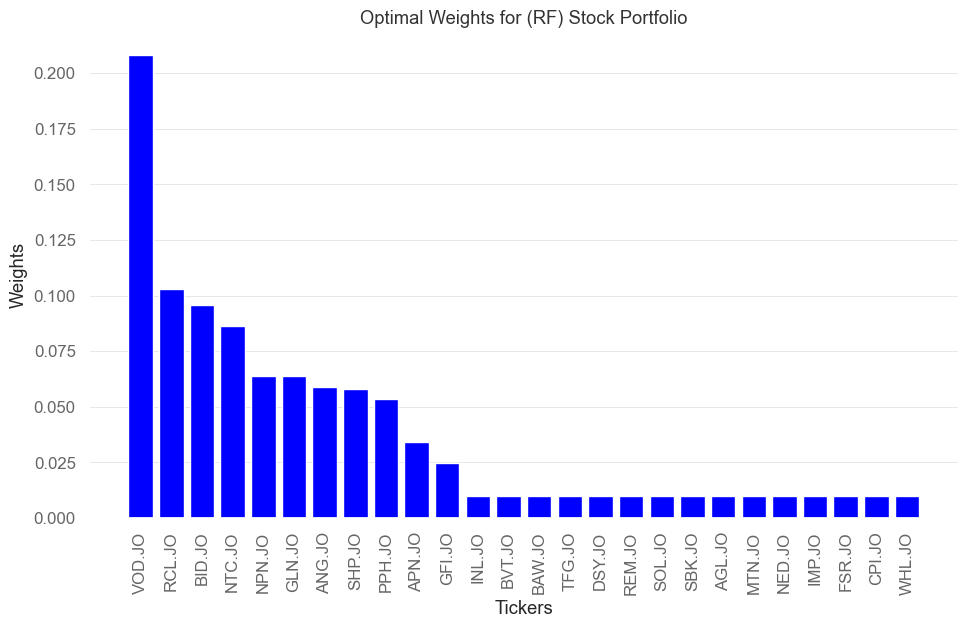

In [94]:
import matplotlib.pyplot as plt
# Plot the weights as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(optimal_weights['Ticker'], optimal_weights['Weight'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Tickers')
plt.ylabel('Weights')
plt.title('Optimal Weights for (RF) Stock Portfolio')
plt.grid(axis='x')  # Add gridlines to the y-axis for better visualization
plt.show()

# Plot a comparison of stock weights in a portfolio.

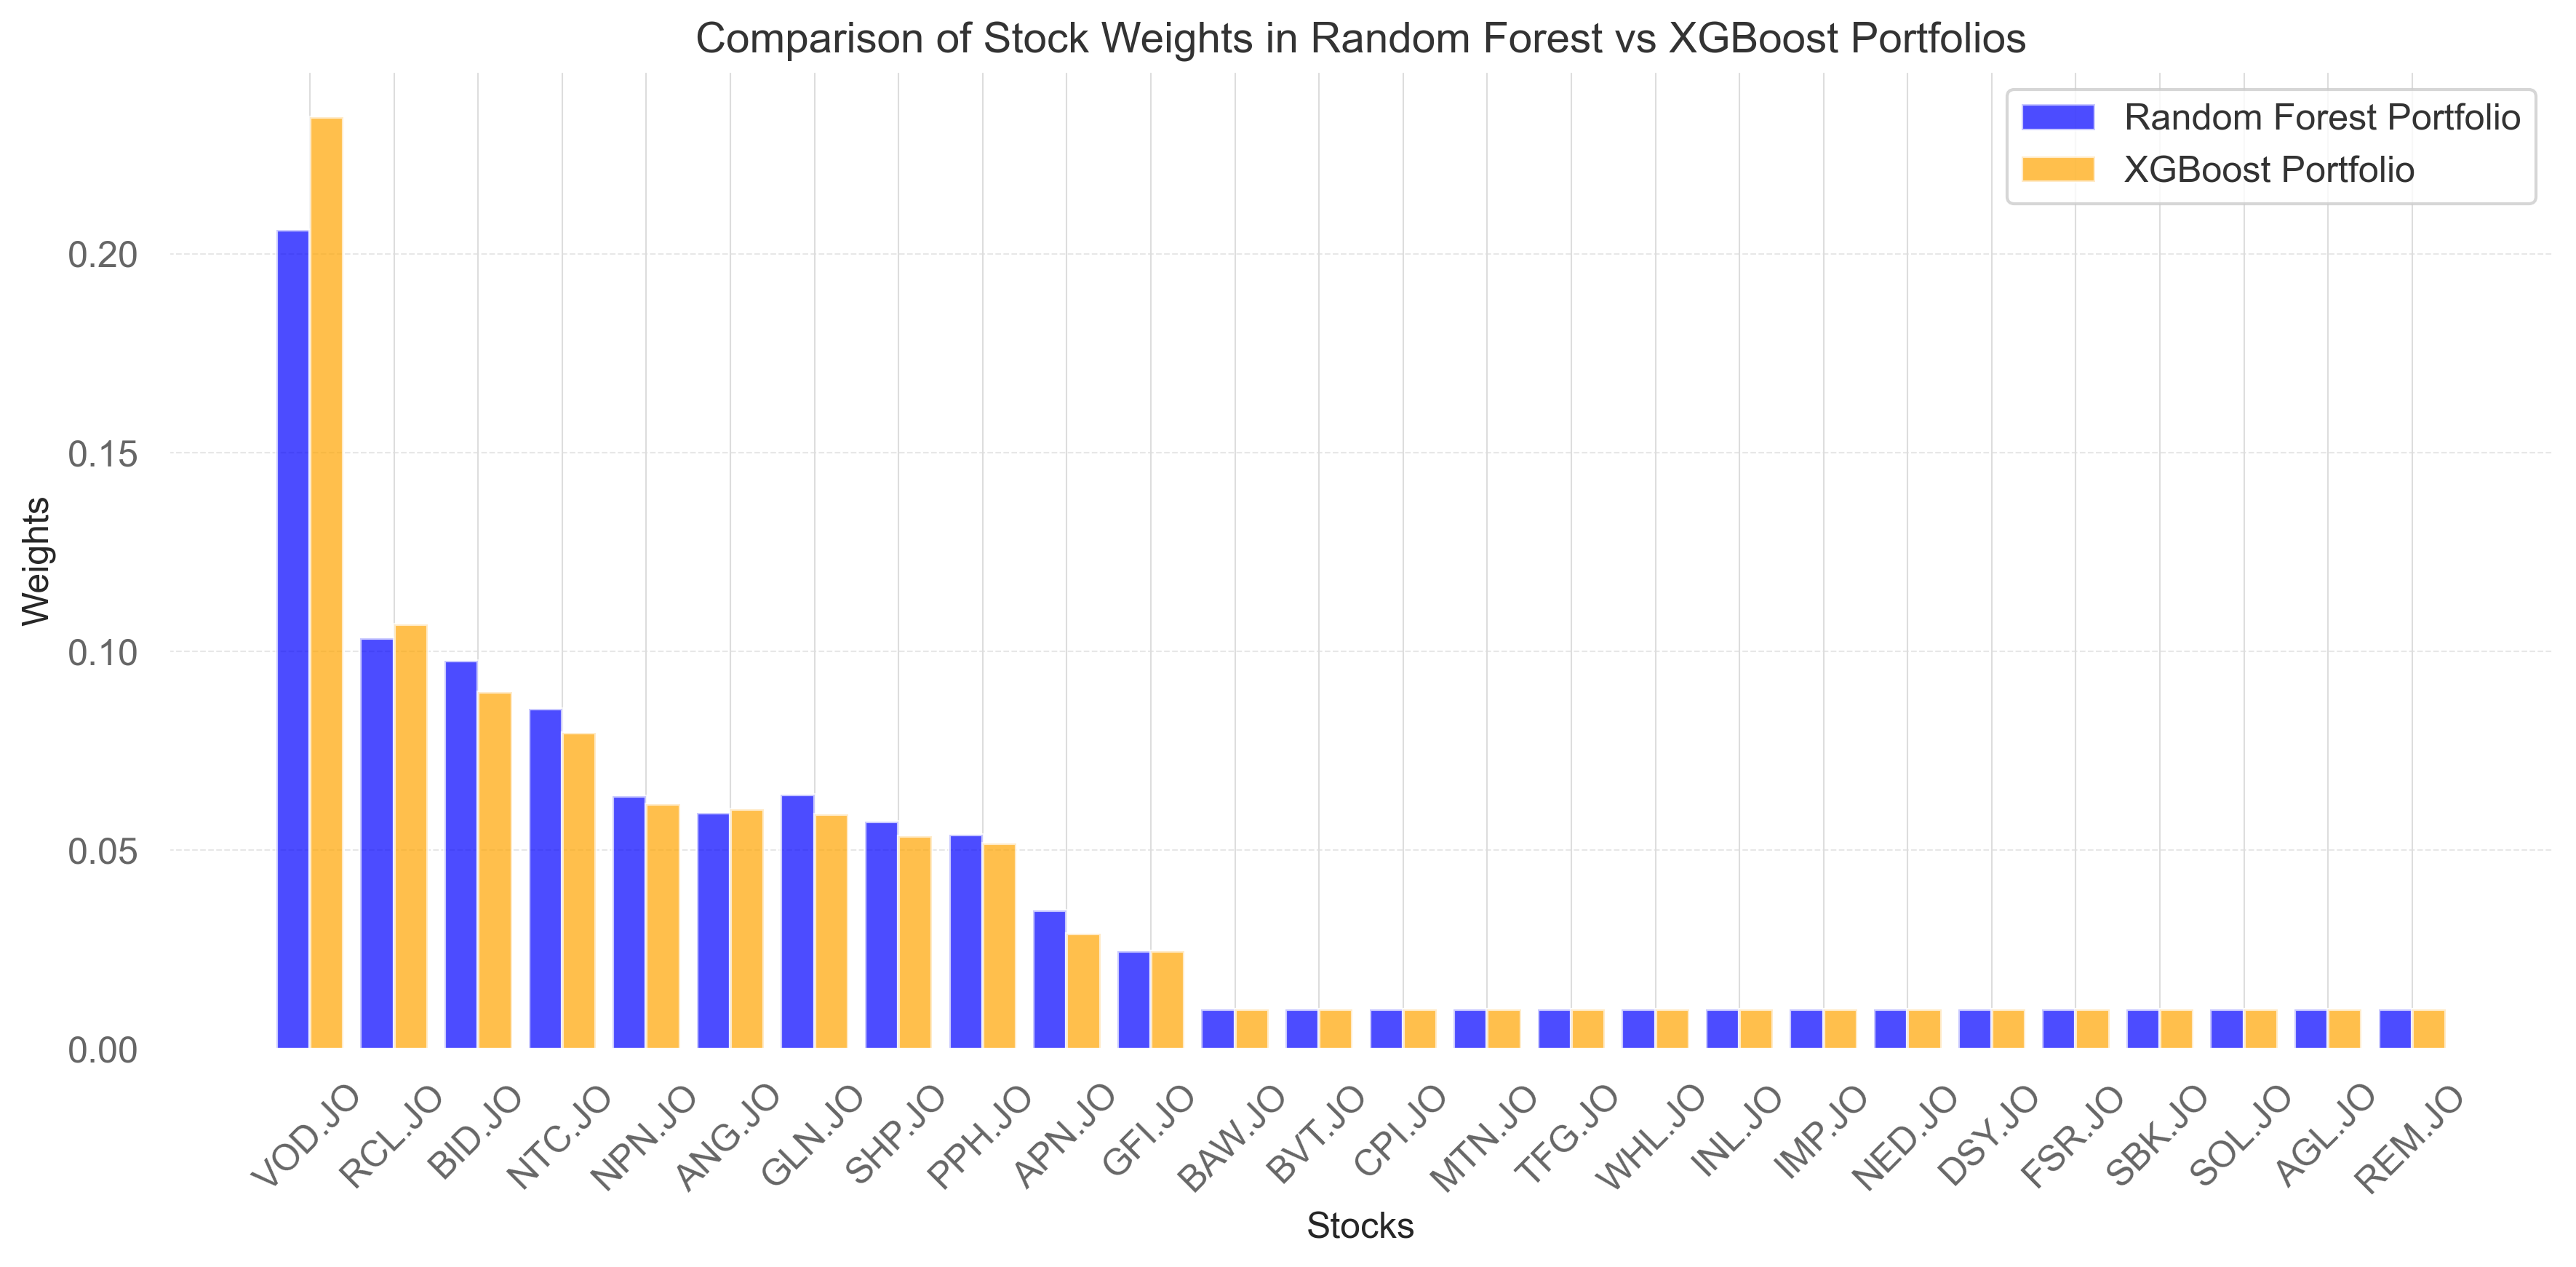

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with the new portfolio data
data_new = {
    "Ticker": [
        "VOD.JO", "RCL.JO", "BID.JO", "NTC.JO", "GLN.JO", "NPN.JO",
        "ANG.JO", "SHP.JO", "PPH.JO", "APN.JO", "GFI.JO", "AGL.JO",
        "SOL.JO", "IMP.JO", "SBK.JO", "FSR.JO", "DSY.JO", "NED.JO",
        "CPI.JO", "INL.JO", "WHL.JO", "TFG.JO", "MTN.JO", "BVT.JO",
        "BAW.JO", "REM.JO"
    ],
    "Random Forest Portfolio": [
        0.2059, 0.1033, 0.0976, 0.0856, 0.0639, 0.0636,
        0.0594, 0.0573, 0.0539, 0.0349, 0.0247, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100
    ],
    "XGBoost Portfolio": [
        0.23425, 0.10679, 0.08971, 0.07957, 0.05902, 0.06168,
        0.06023, 0.05348, 0.05164, 0.02900, 0.02464, 0.01000,
        0.01000, 0.01000, 0.01000, 0.01000, 0.01000, 0.01000,
        0.01000, 0.01000, 0.01000, 0.01000, 0.01000, 0.01000,
        0.01000, 0.01000
    ]
}

df_new = pd.DataFrame(data_new)

# Order the DataFrame by XGBoost weights
df_new_sorted = df_new.sort_values(by="XGBoost Portfolio", ascending=False)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
bar_width = 0.4
index = range(len(df_new_sorted))

# Create bar plots for both portfolios
plt.bar(index, df_new_sorted["Random Forest Portfolio"], bar_width, label='Random Forest Portfolio', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], df_new_sorted["XGBoost Portfolio"], bar_width, label='XGBoost Portfolio', color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.title('Comparison of Stock Weights in Random Forest vs XGBoost Portfolios', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], df_new_sorted["Ticker"], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
